# Classificando o câncer de mama em maligno ou benigno 

- Este conjunto de dados consiste em imagens de ultrassom relacionadas a cânceres de mama benignos e malignos. 

- O dataset foi retirado do kaggle: https://www.kaggle.com/datasets/vuppalaadithyasairam/ultrasound-breast-images-for-breast-cancer 





O projeto em questão foi desenvolvido durante a graduação de Ciência & Tecnologia para a disciplina de Tópicos Avançados em Informática II. Trata-se de um classificador de câncer de mama. Através do Colab Research, utilizando o conceito de deep learning, o algoritmo consegue identificar com grande acurácia através de imagens se um tumor é maligno ou benigno. A priori foi utilizado um dataset de tamanho considerável para treinar a rede neural e a partir desse aprendizado de máquina o algoritmo conseguir identificar o tipo de tumor presente na imagem testada.

> Bloco com recuo



In [1]:
#Ativar o drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Exibe informações sobre o uso de memória do sistema
!free -h

              total        used        free      shared  buff/cache   available
Mem:           12Gi       935Mi       7.4Gi       1.0Mi       4.4Gi        11Gi
Swap:            0B          0B          0B


In [3]:
# Exibir o status atual das GPUs NVIDIA instaladas
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
!pip uninstall keras
!pip install keras

Found existing installation: keras 2.11.0
Uninstalling keras-2.11.0:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/keras-2.11.0.dist-info/*
    /usr/local/lib/python3.9/dist-packages/keras/*
Proceed (Y/n)? y
  Successfully uninstalled keras-2.11.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)


In [45]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import model_from_json
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from sklearn.metrics import classification_report

from skimage.transform import resize
import os
import random

from skimage.io import imread
from skimage.transform import resize

### Tratamento dos dados

In [5]:
# Caminho das pastas
train_dir = '/content/drive/MyDrive/classificador_cancer_mama/dataset/train'
test_dir = '/content/drive/MyDrive/classificador_cancer_mama/dataset/val'

In [6]:
# Quantidade de imagens para treino
for categoria in os.listdir(train_dir):
    categoria_dir = os.path.join(train_dir, categoria)
    imagem_count = len(os.listdir(categoria_dir))
    print(f'Número de imagens na classe {categoria}: ', imagem_count)

Número de imagens na classe benigno:  4074
Número de imagens na classe maligno:  4042


In [7]:
# Quantidade de imagens para teste
for categoria in os.listdir(test_dir):
    categoria_dir = os.path.join(test_dir, categoria)
    imagem_count = len(os.listdir(categoria_dir))
    print(f'Número de imagens na classe {categoria}: ', imagem_count)

Número de imagens na classe benigno:  500
Número de imagens na classe maligno:  400


In [8]:
# Gerador de dados para treinamento
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Gerador de dados para validação
validation_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
# Dimensões das imagens de entrada
img_width, img_height = 50, 50

# Tamanho do batch
batch_size = 16

In [10]:
# Gerador de imagens de treinamento
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
)

# Gerador de imagens de validação
validation_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
)

Found 8116 images belonging to 2 classes.
Found 900 images belonging to 2 classes.


In [12]:
model = Sequential()

# Primeira parte com convoluções e maxpooling
model.add(Conv2D(32, (3,3), input_shape=(img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Segunda parte com convoluções e maxpooling
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Terceira parte com convoluções e maxpooling
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Flatten
model.add(Flatten())

# Rede conectada com duas camadas 
model.add(Dense(64)) # 64 neurônios
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1)) # 1 neurônio para clasificação
model.add(Activation('sigmoid')) # Função de ativação sigmoid

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


validation_benigno_fnames = os.listdir('/content/drive/MyDrive/classificador_cancer_mama/dataset/val/benigno')
validation_maligno_fnames = os.listdir('/content/drive/MyDrive/classificador_cancer_mama/dataset/val/maligno')

resultado = model.fit_generator(
    train_generator,
    steps_per_epoch=8000//batch_size,
    epochs=50      
)

Epoch 1/10


<ipython-input-12-25264d850089>:36: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  resultado = model.fit_generator(


50/50 [==============================] - 213s 3s/step - loss: 0.6739 - accuracy: 0.5800
Epoch 2/10
50/50 [==============================] - 115s 2s/step - loss: 0.6242 - accuracy: 0.6650
Epoch 3/10
50/50 [==============================] - 114s 2s/step - loss: 0.5735 - accuracy: 0.6925
Epoch 4/10
50/50 [==============================] - 90s 2s/step - loss: 0.5598 - accuracy: 0.7275
Epoch 5/10
50/50 [==============================] - 78s 2s/step - loss: 0.5515 - accuracy: 0.7362
Epoch 6/10
50/50 [==============================] - 72s 1s/step - loss: 0.5410 - accuracy: 0.7275
Epoch 7/10
50/50 [==============================] - 72s 1s/step - loss: 0.5004 - accuracy: 0.7450
Epoch 8/10
50/50 [==============================] - 70s 1s/step - loss: 0.4803 - accuracy: 0.7700
Epoch 9/10
50/50 [==============================] - 54s 1s/step - loss: 0.4664 - accuracy: 0.7550
Epoch 10/10
50/50 [==============================] - 54s 1s/step - loss: 0.4549 - accuracy: 0.7812


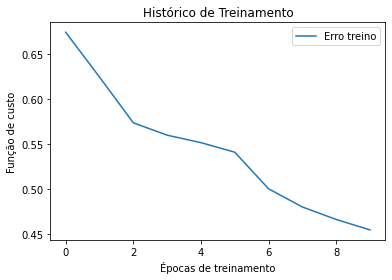

In [14]:
# Grafico do desempenho
plt.plot(resultado.history['loss'])
plt.title('Histórico de Treinamento')
plt.ylabel('Função de custo')
plt.xlabel('Épocas de treinamento')
plt.legend(['Erro treino', 'Erro teste'])
plt.show()

In [15]:
model.evaluate_generator(validation_generator, steps=2000)

<ipython-input-15-1e8547e08092>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(validation_generator, steps=2000)


[0.47367218136787415, 0.7411110997200012]

In [39]:
model.evaluate(train_generator)

508/508 [==============================] - 475s 936ms/step - loss: 0.4184 - accuracy: 0.7952


[0.4183526039123535, 0.7952193021774292]

In [16]:
#Avaliando o modelo carregado no conjunto de teste
loaded_model = model 
loaded_model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

score = loaded_model.evaluate_generator(validation_generator,steps=2000)

print("{}: {}".format(loaded_model.metrics_names[1],score[1]*100))
print("{}: {}".format(loaded_model.metrics_names[0],score[0]*100))

<ipython-input-16-f33a49d58fec>:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = loaded_model.evaluate_generator(validation_generator,steps=2000)


accuracy: 74.11110997200012
loss: 47.36722111701965


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 activation_5 (Activation)   (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 activation_6 (Activation)   (None, 22, 22, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                  

In [23]:
# Avaliar a Rede Neural
print("Avaliando a rede neural...")
predictions = model.predict(validation_generator)

Avaliando a rede neural...
57/57 [==============================] - 5s 87ms/step


In [27]:
# Inicializar matrizes para armazenar as previsões e rótulos reais
y_true = np.zeros(shape=(validation_generator.n))
y_pred = np.zeros(shape=(validation_generator.n))

# Iterar sobre o gerador de dados e preencher as matrizes
for i in range(validation_generator.n // validation_generator.batch_size):
    batch_start_idx = i * validation_generator.batch_size
    batch_end_idx = (i+1) * validation_generator.batch_size
    y_pred[batch_start_idx:batch_end_idx] = np.argmax(predictions[i])
    y_true[batch_start_idx:batch_end_idx] = validation_generator[i][1]

# Calcular as métricas de avaliação
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.56      1.00      0.72       501
         1.0       0.00      0.00      0.00       399

    accuracy                           0.56       900
   macro avg       0.28      0.50      0.36       900
weighted avg       0.31      0.56      0.40       900



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 27ms/step
[1.] 

A IMAGEM CARREGADA É SUSPEITA COMO: Maligno


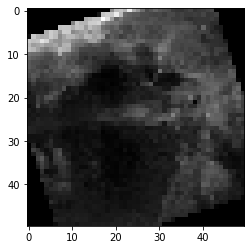

In [49]:
# Previsão
img = load_img('/content/drive/MyDrive/classificador_cancer_mama/dataset/val/maligno/malignant (16)-rotated2.png', target_size=(50, 50))
img_array = img_to_array(img)
resized_img_array = resize(img_array, (50, 50, 3))
input_data = np.expand_dims(resized_img_array, axis=0)
predictions = model.predict(input_data)
a=predictions[0]
print(a, '\n')
if a<0.5:
      op="Benigno"   
else:
      op="Maligno"
plt.imshow(img)
print("A IMAGEM CARREGADA É SUSPEITA COMO: " +str(op)) 

1/1 [==============================] - 0s 28ms/step
[0.] 

A IMAGEM CARREGADA É SUSPEITA COMO: Benigno


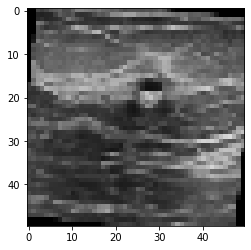

In [46]:
# Previsão
img = load_img('/content/drive/MyDrive/classificador_cancer_mama/dataset/val/benigno/benign (12)-rotated1-rotated1.png', target_size=(50, 50))
img_array = img_to_array(img)
resized_img_array = resize(img_array, (50, 50, 3))
input_data = np.expand_dims(resized_img_array, axis=0)
predictions = model.predict(input_data)
a=predictions[0]
print(a, '\n')
if a<0.5:
      op="Benigno"   
else:
      op="Maligno"
plt.imshow(img)
print("A IMAGEM CARREGADA É SUSPEITA COMO: " +str(op)) 